In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical

import numpy
import sys
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

X_train.shape

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


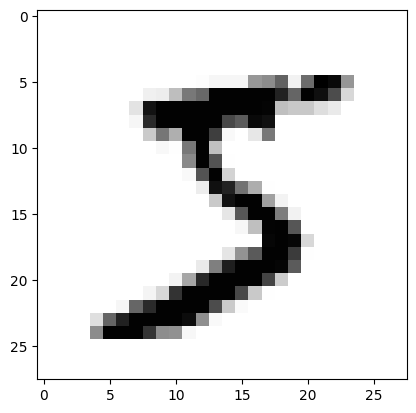

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [10]:
# 픽셀로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [11]:
# 28x28 2차원 데이터를 784개의 1차원 데이터로 바꿔주면 784개 속성으로 이용 가능
# 차원 변환 과정(2차원 -> 1차원)
X_train = X_train.reshape(X_train.shape[0], 784)

In [12]:
# 정규화(normalization) : 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정
# 현재 주어진 데이터의 값은 0부터 255까지의 정수로, 정규화를 위해 255로 나누어 주려면 먼저 이 값을 실수형으로 바꿔야 함 -> astype('float64')

# 케라스는 데이터가 0~1 사이의 값일 때 최적의 성능으로 예측함
# 데이터 정규화(normalization) : 225로 나눠줌
X_train = X_train.astype('float64') # 현재 정수형이므로 실수형으로 바꾼 후 정규화 실행
X_train = X_train / 255

# 테스트셋에도 정규화 작업
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [13]:
# 실제로 이 숫자의 레이블이 어떤지를 불러오고자 Y_class_train[0]을 다음과 같이 출력해보자 -> 5
# 아이리스 품종을 예측할 때 딥러닝의 분류 문제를 해결하려면 원-핫 인코딩 방식을 적용해야 함
# 즉, 0~9까지의 정수형 값을 갖는 현재 형태에서 0 또는 1로만 이루어진 벡터로 값을 수정해야 함
# -> 바이너리화 과정
# 지금 우리가 열어본 이미지의 class는 5였음 -> 이를 [0,0,0,0,0,1,0,0,0,0]로 바꿔야 함
# : to_categorical(클래스, 클래스의 개수) 함수 이용

# 클래스 값 확인
print('class : %d ' % (Y_class_train[0]))

# 현재 클래스를 0~9 정수값에서 0 or 1인 벡터로 수정해야 함
# 바이너리화 과정
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)

print(Y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 차원 축소, 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [15]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])

In [16]:
# 모델 저장, 모델 최적화 단계에서 학습 자동 중단 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [17]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data= \
                    (X_test, Y_test), epochs=30, batch_size=200, verbose=0, \
                        callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.14819, saving model to ./model/01-0.1482.hdf5


/Users/taewon/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.14819 to 0.10315, saving model to ./model/02-0.1031.hdf5

Epoch 3: val_loss improved from 0.10315 to 0.08752, saving model to ./model/03-0.0875.hdf5

Epoch 4: val_loss improved from 0.08752 to 0.07562, saving model to ./model/04-0.0756.hdf5

Epoch 5: val_loss improved from 0.07562 to 0.07293, saving model to ./model/05-0.0729.hdf5

Epoch 6: val_loss improved from 0.07293 to 0.06459, saving model to ./model/06-0.0646.hdf5

Epoch 7: val_loss improved from 0.06459 to 0.06393, saving model to ./model/07-0.0639.hdf5

Epoch 8: val_loss improved from 0.06393 to 0.05812, saving model to ./model/08-0.0581.hdf5

Epoch 9: val_loss did not improve from 0.05812

Epoch 10: val_loss did not improve from 0.05812

Epoch 11: val_loss did not improve from 0.05812

Epoch 12: val_loss did not improve from 0.05812

Epoch 13: val_loss did not improve from 0.05812

Epoch 14: val_loss did not improve from 0.05812

Epoch 15: val_loss did not improve from 0.05812

Epoch 16: val

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

313/313 [==============================] - 0s 463us/step - loss: 0.0716 - accuracy: 0.9814

 Test Accuracy: 0.9814


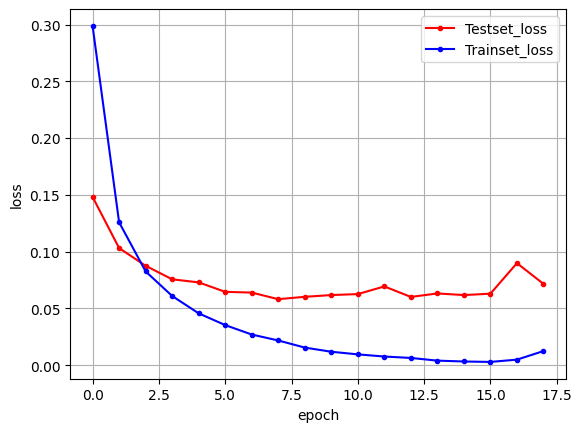

In [21]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차 
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data= \
                    (X_test, Y_test), epochs=30, batch_size=200, verbose=0, \
                        callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Epoch 1: val_loss improved from inf to 0.05675, saving model to ./model/01-0.0567.hdf5


/Users/taewon/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.05675 to 0.03876, saving model to ./model/02-0.0388.hdf5

Epoch 3: val_loss improved from 0.03876 to 0.03291, saving model to ./model/03-0.0329.hdf5

Epoch 4: val_loss improved from 0.03291 to 0.02980, saving model to ./model/04-0.0298.hdf5

Epoch 5: val_loss improved from 0.02980 to 0.02898, saving model to ./model/05-0.0290.hdf5

Epoch 6: val_loss improved from 0.02898 to 0.02494, saving model to ./model/06-0.0249.hdf5

Epoch 7: val_loss did not improve from 0.02494

Epoch 8: val_loss did not improve from 0.02494

Epoch 9: val_loss did not improve from 0.02494

Epoch 10: val_loss did not improve from 0.02494

Epoch 11: val_loss did not improve from 0.02494

Epoch 12: val_loss did not improve from 0.02494

Epoch 13: val_loss did not improve from 0.02494

Epoch 14: val_loss did not improve from 0.02494

Epoch 15: val_loss did not improve from 0.02494

Epoch 16: val_loss did not improve from 0.02494
313/313 [==============================] - 1s 4ms/ste

KeyError: 'lose'

313/313 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9924

 Test Accuracy: 0.9924


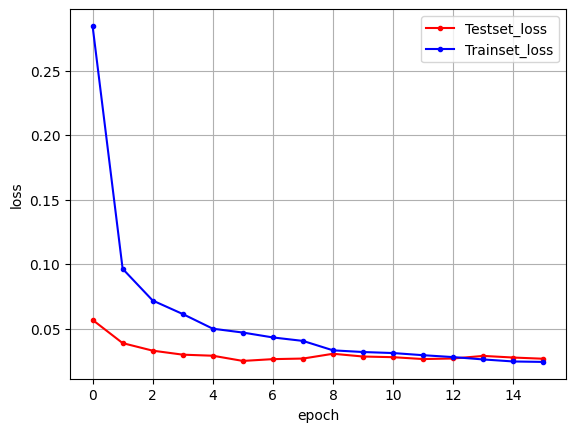

In [24]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 이미지 인식_CDN

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

4422102/4422102 [==============================] - 0s 0us/step


In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 545us/step - loss: 0.4904 - accuracy: 0.8285
Epoch 2/5
1875/1875 [==============================] - 1s 499us/step - loss: 0.3746 - accuracy: 0.8661
Epoch 3/5
1875/1875 [==============================] - 1s 502us/step - loss: 0.3334 - accuracy: 0.8778
Epoch 4/5
1875/1875 [==============================] - 1s 503us/step - loss: 0.3106 - accuracy: 0.8875
Epoch 5/5
1875/1875 [==============================] - 1s 524us/step - loss: 0.2925 - accuracy: 0.8915


In [30]:
from keras import layers
from keras.models import Sequential

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images / 255
test_images = test_images / 255

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10, activation='softmax'))